<a href="https://colab.research.google.com/github/joemunozb/Taller-Ing-Ambiental-y-Ciencia-de-Datos/blob/main/Taller_Ing_Amb_y_Ciencia_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TALLER PRÁCTICO:**
## **Introducción al análisis de datos Hidrológicos con Python**
\
**Jorge Enrique Muñoz Barragán** \
jmunozb@ucentral.edu.co \
Docente \
Facultad de Ingeniería y Ciencias Básicas \
**Universidad Central**


[Pregrado en Ingeniería Ambiental - Universidad Central](https://www.ucentral.edu.co/programa-academico/ingenieria-ambiental)\
direccionambiental@ucentral.edu.co \
[Pregrado en Ciencia de Datos - Universidad Central](https://www.ucentral.edu.co/programa-academico/ciencia-datos) \
cienciadedatos@ucentral.edu.co \

## **Primera Parte del Taller: CURVA DE DURACIÓN DE CAUDALES**

1.   Curva de Duración de Caudales
2.   Carga de datos desde Google Drive
3.   Construcción de la Curva de Duración de Caudales





### Instalación de Liberias

In [ ]:
# Instalación de librerías necesarias
!pip install pandas numpy matplotlib scipy

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carga del Archivo


In [ ]:
# @title
# Autenticación y acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/caudales_medios_diarios.csv'

# Carga del archivo CSV
caudales_medios = pd.read_csv(file_path)

Mounted at /content/drive


### Previsualizar los registros

In [ ]:
# Visualización del archivo completo
print(caudales_medios)

# Visualización de los primeros registros
print(caudales_medios.head())

# Verificación de la estructura del DataFrame
print(caudales_medios.info())

# Visualización de los datos de interés
print(caudales_medios[['Fecha', 'Valor']])

# Ordenar los caudales de mayor a menor
caudales_descendente = caudales_medios.sort_values(by='Valor', ascending=False)

print(caudales_descendente[['Fecha', 'Valor']])


       CodigoEstacion                  NombreEstacion   Latitud   Longitud  \
0            23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
1            23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
2            23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
3            23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
4            23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
...               ...                             ...       ...        ...   
27995        23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
27996        23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
27997        23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
27998        23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   
27999        23037010  PUERTO SALGAR - AUT [23037010]  5.469667 -74.662167   

       Altitud     Categoria  \
0          186  Limnigráfica   

### Crear una nueva columna en el archivo

In [ ]:
# Generar una columna de porcentajes de excedencia

#print(len(caudales_descendente))

caudales_descendente['excedencia'] = np.arange(1, len(caudales_descendente) + 1) / len(caudales_descendente)

print(caudales_descendente['excedencia'])



25401    0.000036
25402    0.000071
23209    0.000107
23208    0.000143
25400    0.000179
           ...   
72       0.999857
69       0.999893
73       0.999929
70       0.999964
71       1.000000
Name: excedencia, Length: 28000, dtype: float64


### Construcción de Curva de Duración de Caudales

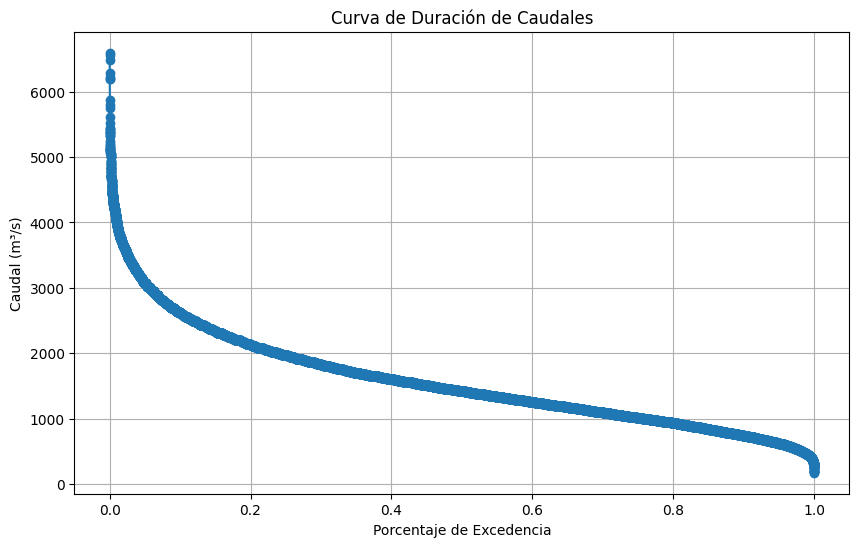

In [ ]:
# Construcción de la curva de duración de caudales
plt.figure(figsize=(10, 6))
plt.plot(caudales_descendente['excedencia'], caudales_descendente['Valor'], marker='o', linestyle='-')
plt.xlabel('Porcentaje de Excedencia')
plt.ylabel('Caudal (m³/s)')
plt.title('Curva de Duración de Caudales')
plt.grid(True)
plt.show()

### Cálculo del "Q95"

En Ingeniería Ambiental, es muy usual utilizar el denominado Q95, o caudal de excedencia del 95% del tiempo. Representa un caudal que se presenta con un valor igual o mayor, o durante determinado tiempo (una probabiidad del 95% del tiempo), es decir, muy probable. Se utiliza para evaluar condiciones de calidad del agua, o límites de utilización del agua en un río.

El caudal Q95 (excedido el 95% del tiempo) es: 621.475 m³/s


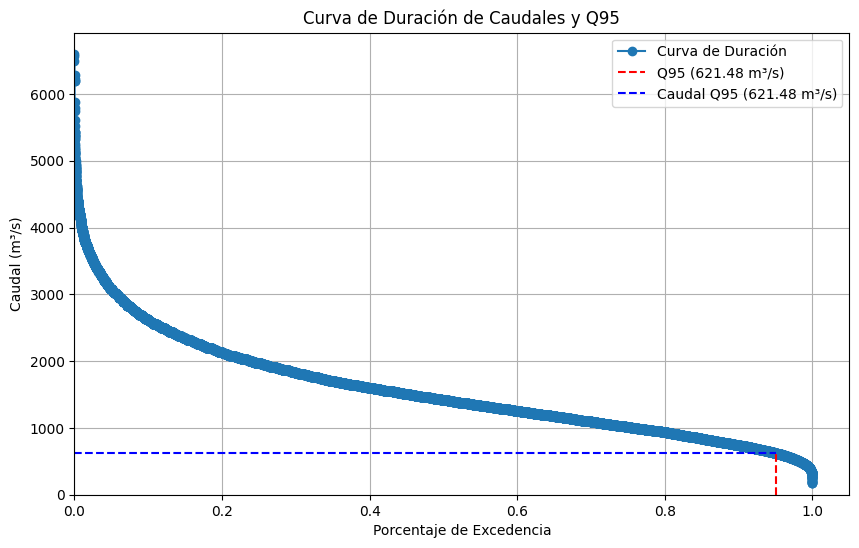

In [ ]:
# Cálculo de Q95
Q95 = np.percentile(caudales_descendente['Valor'], 5) ##Se toma 5, porque los datos están en descendente.
print('El caudal Q95 (excedido el 95% del tiempo) es:', Q95, 'm³/s')

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

plt.plot(caudales_descendente['excedencia'], caudales_descendente['Valor'], marker='o', linestyle='-', label='Curva de Duración')

# Ajustar límites para que empiecen en cero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Recalcular los límites del gráfico después de ajustar
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()


plt.plot([0.95, 0.95], [ylim[0], Q95], color='r', linestyle='--', label=f'Q95 ({Q95:.2f} m³/s)')
plt.plot([xlim[0], 0.95], [Q95, Q95], color='b', linestyle='--', label=f'Caudal Q95 ({Q95:.2f} m³/s)')

plt.xlabel('Porcentaje de Excedencia')
plt.ylabel('Caudal (m³/s)')
plt.title('Curva de Duración de Caudales y Q95')
plt.legend()
plt.grid(True)

plt.show()


## **Segunda Parte del Taller: PRONÓSTICO DE EVENTOS EXTERMOS**

1.   Carga de datos
2.   Carga de datos desde Google Drive
3.   Construcción de la Curva de Duración de Caudales

In [ ]:
# Carga de Liberías

import numpy as np
import scipy.stats as stats
import pandas as pd


### Ejercicio:

Q_a = 7500  # m³/s
P_r = 60    # años

### Carga de Datos

# Registro de caudales

datos = {
    'Año': [1954, 1955, 1956, 1957, 1958 ,1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978],
    'Caudal': [2230, 3220, 2246, 1804, 2737, 2070, 3682, 4240, 2367, 7061, 2489, 2350, 3706, 2675, 6267, 5971, 4744, 6000, 4060, 6900, 5565, 3130, 2414, 1796, 7430]
}

## Número de años analizados

n = len(datos['Año'])

print('Número de años analizados', n, 'años')

# Crear un DataFrame de pandas o paquete de datos
caudales = pd.DataFrame(datos)

# Mostrar los caudales
print(caudales)

Número de años analizados 25 años
     Año  Caudal
0   1954    2230
1   1955    3220
2   1956    2246
3   1957    1804
4   1958    2737
5   1959    2070
6   1960    3682
7   1961    4240
8   1962    2367
9   1963    7061
10  1964    2489
11  1965    2350
12  1966    3706
13  1967    2675
14  1968    6267
15  1969    5971
16  1970    4744
17  1971    6000
18  1972    4060
19  1973    6900
20  1974    5565
21  1975    3130
22  1976    2414
23  1977    1796
24  1978    7430


In [ ]:
## Ordenar datos en un nuevo data frame

# Creación de un nuevo dataframe de pandas:

  # Ordenar los datos de Caudal de mayor a menor

Caudal_desc = caudales['Caudal'].sort_values(ascending=False).reset_index(drop=True)

  # Crear una numeración
numeracion = pd.Series(range(1, len(Caudal_desc) + 1))

  # Crear el nuevo DataFrame

serie = pd.DataFrame({
    'Numer': numeracion,
    'Caudal': Caudal_desc
})

# Verificar el nuevo DataFrame
print(serie)

    Numer  Caudal
0       1    7430
1       2    7061
2       3    6900
3       4    6267
4       5    6000
5       6    5971
6       7    5565
7       8    4744
8       9    4240
9      10    4060
10     11    3706
11     12    3682
12     13    3220
13     14    3130
14     15    2737
15     16    2675
16     17    2489
17     18    2414
18     19    2367
19     20    2350
20     21    2246
21     22    2230
22     23    2070
23     24    1804
24     25    1796


In [ ]:
## Aplicación de Funciones de Distribución de Probabilidad

 # FUNCIÓN DE DISTRIBUCIÓN DE PROBABILIDAD NORMAL

print('FUNCIÓN NORMAL:')

print('   - PARÁMETROS:')

       # Parámetro mu (Media aritmética)

mu_norm = serie['Caudal'].mean()
print("mu = ", mu_norm, 'm³/s')

       # Parámetro sigma (Desviación Estándar)

sigma_norm = serie['Caudal'].std()
print("sigma = ", sigma_norm, 'm³/s')

       # Variable estandarizada, z, para un caudal de 7500 m³/s

x = Q_a

z_nomr = (x - mu_norm) / sigma_norm
print("z = ", z_nomr)

print('     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A', Q_a, 'm³/s')

      # Probabilidad de ocurrencia (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

p_norm = stats.norm.cdf(z_nomr)

print('        La probabilidad de ocurrencia de un caudal igual o mayor a ', Q_a, 'm³/s es : p = ', p_norm)

      # Probabilidad de ocurrencia en años (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

T_norm = 1 / (1-p_norm)

print('        Es probable que cada', T, 'años se registre un caudal igual o superior a ', Q_a, "m³/s (T = ", T_norm, "años)")

print('     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE ', P_r, 'AÑOS:')

p_d = (P_r-1) / P_r

z_r = stats.norm.ppf(p_d)

print('        z = ', z_r)

x_r_norm = mu_norm + sigma_norm * z_r

print('        La probabiliad de un periodo de retorno de diseño de ', P_r, 'años es :', p_d)

print('        Por lo tanto, el caudal de diseño para un periodo de retorno de ', P_r, 'años es :', x_r_norm, ' años')



FUNCIÓN NORMAL:
   - PARÁMETROS:
mu =  3886.16 m³/s
sigma =  1825.9065255373835 m³/s
z =  1.9792031790545297
     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A 7500 m³/s
        La probabilidad de ocurrencia de un caudal igual o mayor a  7500 m³/s es : p =  0.9761034324251197
        Es probable que cada 20.291954177440186 años se registre un caudal igual o superior a  7500 m³/s (T =  41.84701408963782 años)
     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE  60 AÑOS:
        z =  2.128045234184983
        La probabiliad de un periodo de retorno de diseño de  60 años es : 0.9833333333333333
        Por lo tanto, el caudal de diseño para un periodo de retorno de  60 años es : 7771.77167973709  años


In [ ]:
import math

 # FUNCIÓN DE DISTRIBUCIÓN DE PROBABILIDAD LOG-NORMAL

print('FUNCIÓN LOG-NORMAL:')

print('   - PARÁMETROS:')

       # Serie_Logarítmica (Logaritmo de los datos)

serie_log= np.log(serie['Caudal'])
#print(serie_log)

       # Parámetro mu (Media aritmética)

alfa_log_norm = serie_log.mean()
print("alfa = ", alfa_log_norm)

       # Parámetro sigma (Desviación Estándar)

beta_log_norm = serie_log.std()
print("beta = ", beta_log_norm)

       # Variable estandarizada, z, para un caudal de 7500 m³/s

x_log = math.log(Q_a)
print("x_log = ", x_log)

z_log_nomr = (x_log - alfa_log_norm) / beta_log_norm
print("z = ", z_log_nomr)

print('     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A', Q_a, 'm³/s')

      # Probabilidad de ocurrencia (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

p_log_norm = stats.norm.cdf(z_log_nomr)

print('        La probabilidad de ocurrencia de un caudal igual o mayor a ', Q_a, 'm³/s es : p = ', p_log_norm)

      # Probabilidad de ocurrencia en años (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

T_log_norm = 1 / (1-p_log_norm)

print('        Es probable que cada', T, 'años se registre un caudal igual o superior a ', Q_a, "m³/s (T = ", T_log_norm, "años)")

print('     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE ', P_r, 'AÑOS:')

p_d = (P_r-1) / P_r

z_r_log = stats.norm.ppf(p_d)

print('        z = ', z_r_log)

x_r_log = math.exp(z_r_log * beta_log_norm + alfa_log_norm)

print('        La probabiliad de un periodo de retorno de diseño de ', P_r, 'años es :', p_d)

print('        Por lo tanto, el caudal de diseño para un periodo de retorno de ', P_r, 'años es :', x_r_log, ' años')



FUNCIÓN LOG-NORMAL:
   - PARÁMETROS:
alfa =  8.162268844290402
beta =  0.46032063940992135
x_log =  8.922658299524402
z =  1.6518691323698467
     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A 7500 m³/s
        La probabilidad de ocurrencia de un caudal igual o mayor a  7500 m³/s es : p =  0.9507193840841726
        Es probable que cada 20.291954177440186 años se registre un caudal igual o superior a  7500 m³/s (T =  20.291954177440186 años)
     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE  60 AÑOS:
        z =  2.128045234184983
        La probabiliad de un periodo de retorno de diseño de  60 años es : 0.9833333333333333
        Por lo tanto, el caudal de diseño para un periodo de retorno de  60 años es : 9338.04306371302  años


In [ ]:
import scipy.stats as st

 # FUNCIÓN DE DISTRIBUCIÓN DE PROBABILIDAD GUMBEL

print('FUNCIÓN GUMBEL:')

print('   - PARÁMETROS:')

       # Características de los datos

N = len(serie['Caudal'])
print('Número de datos', N)

Media = serie['Caudal'].mean()
print("Media = ", Media)

Desviacion = serie['Caudal'].std()
print("Desviación = ", Desviacion)

       # Ajuste a Función Gumbel

yi = [-np.log(np.log((N + 1) / (j + 1))) for j in range(N)]

       # Paráemtros de la función Gumbel

mu_gumbel = np.mean(yi)
sigma_gumbel = np.std(yi, ddof=0)
alfa_gumbel = sigma_gumbel/Desviacion
beta_gumbel = Media - (mu_gumbel/alfa_gumbel)

print("Parámetro de ubicación (mu):", mu_gumbel)
print("Parámetro de escala (sigma):", sigma_gumbel)
print("Parámetro alfa = ", alfa_gumbel)
print("Parámetro beta = ", beta_gumbel)

print('     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A', Q_a, 'm³/s')

      # Probabilidad de ocurrencia (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

p_gumbel = math.exp(-math.exp(-alfa_gumbel * (Q_a - beta_gumbel)))

print('        La probabilidad de ocurrencia de un caudal igual o mayor a ', Q_a, 'm³/s es : p = ', p_gumbel)

      # Probabilidad de ocurrencia en años (Probabilidad de que el caudal máximo sea mayor o igual a 7500)

T_gumbel = 1 / (1-p_log_norm)

print('        Es probable que cada', T, 'años se registre un caudal igual o superior a ', Q_a, "m³/s (T = ", T_gumbel, "años)")

print('     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE ', P_r, 'AÑOS:')

p_d = (P_r-1) / P_r

x_r_gumbel = beta_gumbel - (1/alfa_gumbel) * math.log(math.log(P_r/(P_r-1)))

print('        La probabiliad de un periodo de retorno de diseño de ', P_r, 'años es :', p_d)

print('        Por lo tanto, el caudal de diseño para un periodo de retorno de ', P_r, 'años es :', x_r_gumbel, ' años')



FUNCIÓN GUMBEL:
   - PARÁMETROS:
Número de datos 25
Media =  3886.16
Desviación =  1825.9065255373835
Parámetro de ubicación (mu): 0.530863915632092
Parámetro de escala (sigma): 1.0914456186714752
Parámetro alfa =  0.0005977554729151599
Parámetro beta =  2998.0645501279114
     A) PROBABILIDAD DE QUE EN UN AÑO CUALQUIERA EL CAUDAL SEA MAYOR O IGUAL A 7500 m³/s
        La probabilidad de ocurrencia de un caudal igual o mayor a  7500 m³/s es : p =  0.9344386938670165
        Es probable que cada 20.291954177440186 años se registre un caudal igual o superior a  7500 m³/s (T =  20.291954177440186 años)
     B) EL CAUDAL DE DISEÑO PARA UN PERIODO DE RETORNO DE  60 AÑOS:
        La probabiliad de un periodo de retorno de diseño de  60 años es : 0.9833333333333333
        Por lo tanto, el caudal de diseño para un periodo de retorno de  60 años es : 9833.556583479622  años


In [ ]:
#Resumen de resultados:

resumen_resultados = {
    'Función': ['Normal', 'Log-Normal', 'Gumbel'],
    'Prob de Ocurrencia': [p_norm, p_log_norm, p_gumbel],
    'Prob en Años': [T_norm, T_log_norm, T_gumbel],
    'Caudal de Diseño': [x_r_norm, x_r_log, x_r_gumbel]
}

# Crear un DataFrame de los resultados

resultados = pd.DataFrame(resumen_resultados)

# Mostrar los resultados
print(resultados)

      Función  Prob de Ocurrencia  Prob en Años  Caudal de Diseño
0      Normal            0.976103     41.847014       7771.771680
1  Log-Normal            0.950719     20.291954       9338.043064
2      Gumbel            0.934439     20.291954       9833.556583


# PRUEBAS DE BONDAD DE AJUSTE

# Método del error cuadrático mínimo

In [ ]:
## Cálculo de caudales Ajustados a las FDP

# Creación de un nuevo dataframe de pandas

  # Número de años en la serie original

N = len(serie['Caudal'])
print('Número de años en la serie original:',N)

  # Cálculo de periodos de retorno

m = pd.Series(range(1, N + 1))
T = (N + 1) / m
teoric_p = 1 - (m / (N + 1))

# Crear un DataFrame que contenga todas las series
Caudales_ajustados = pd.DataFrame({
    'm': m,
    'T (años)': T,
    'P Teórica': teoric_p
})

print(Caudales_ajustados)

Número de años en la serie original: 25
     m   T (años)  P Teórica
0    1  26.000000   0.961538
1    2  13.000000   0.923077
2    3   8.666667   0.884615
3    4   6.500000   0.846154
4    5   5.200000   0.807692
5    6   4.333333   0.769231
6    7   3.714286   0.730769
7    8   3.250000   0.692308
8    9   2.888889   0.653846
9   10   2.600000   0.615385
10  11   2.363636   0.576923
11  12   2.166667   0.538462
12  13   2.000000   0.500000
13  14   1.857143   0.461538
14  15   1.733333   0.423077
15  16   1.625000   0.384615
16  17   1.529412   0.346154
17  18   1.444444   0.307692
18  19   1.368421   0.269231
19  20   1.300000   0.230769
20  21   1.238095   0.192308
21  22   1.181818   0.153846
22  23   1.130435   0.115385
23  24   1.083333   0.076923
24  25   1.040000   0.038462


In [ ]:
  # Cálculo de Datos Ajustados a Función Normal
serie_z_norm = pd.Series(stats.norm.ppf(teoric_p))
norm_a = pd.Series(serie_z_norm*sigma_norm + mu_norm)
#print(norm_a)

  # Cálculo de Datos Ajustados a Función Normal
serie_z_log_norm = pd.Series(stats.norm.ppf(teoric_p))
log_norm_a = (pd.Series(np.exp(serie_z_norm*beta_log_norm + alfa_log_norm)))
#print(log_norm_a)
  # Cálculo de Datos Ajustados a Función Gumbel
gumbel_a = beta_gumbel - (1/alfa_gumbel) * np.log(np.log(1/teoric_p))
#print(gumbel_a)

Caudales_ajustados['Ajus Norm'] = norm_a
Caudales_ajustados['Ajus LogNor'] = log_norm_a
Caudales_ajustados['Ajus Gumbel'] = gumbel_a

print(Caudales_ajustados)

     m   T (años)  P Teórica    Ajus Norm  Ajus LogNor  Ajus Gumbel
0    1  26.000000   0.961538  7115.869180  7914.846013  8415.915865
1    2  13.000000   0.923077  6490.043067  6759.616671  7222.525982
2    3   8.666667   0.884615  6074.289319  6086.982510  6509.214862
3    4   6.500000   0.846154  5748.723850  5607.335824  5991.659322
4    5   5.200000   0.807692  5473.646541  5231.652912  5580.678181
5    6   4.333333   0.769231  5230.604038  4920.720580  5236.473865
6    7   3.714286   0.730769  5009.350157  4653.761009  4937.743094
7    8   3.250000   0.692308  4803.499498  4418.409007  4671.692892
8    9   2.888889   0.653846  4608.717400  4206.681466  4429.989517
9   10   2.600000   0.615385  4421.846706  4013.095954  4206.852969
10  11   2.363636   0.576923  4240.437251  3833.693596  3998.060004
11  12   2.166667   0.538462  4062.467006  3665.488040  3800.377015
12  13   2.000000   0.500000  3886.160000  3506.132455  3611.213132
13  14   1.857143   0.461538  3709.852994  3353.